In [ ]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Constants
G = 6.67430e-11  # gravitational constant, m^3 kg^-1 s^-2
M_sun = 1.989e30  # mass of the Sun, kg
AU = 1.496e11  # astronomical unit in meters
year_in_seconds = 365.25 * 24 * 3600

# Simulation parameters
dt = 60 * 60 * 6  # 6-hour time steps
num_steps = int(year_in_seconds / dt)  # simulate one year

# Initial conditions for Earth (approximate circular orbit)
x0 = AU
y0 = 0
vx0 = 0
vy0 = 29_783  # m/s (orbital speed of Earth)

# Initialize arrays
x = np.zeros(num_steps)
y = np.zeros(num_steps)
vx = np.zeros(num_steps)
vy = np.zeros(num_steps)
t = np.arange(0, num_steps * dt, dt)

# Set initial values
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0


In [10]:
# Simulate Earth's orbit using basic Euler method
for i in range(1, num_steps):
    r = np.sqrt(x[i-1]**2 + y[i-1]**2)
    force = -G * M_sun / r**3
    ax = force * x[i-1]
    ay = force * y[i-1]

    vx[i] = vx[i-1] + ax * dt
    vy[i] = vy[i-1] + ay * dt
    x[i] = x[i-1] + vx[i] * dt
    y[i] = y[i-1] + vy[i] * dt

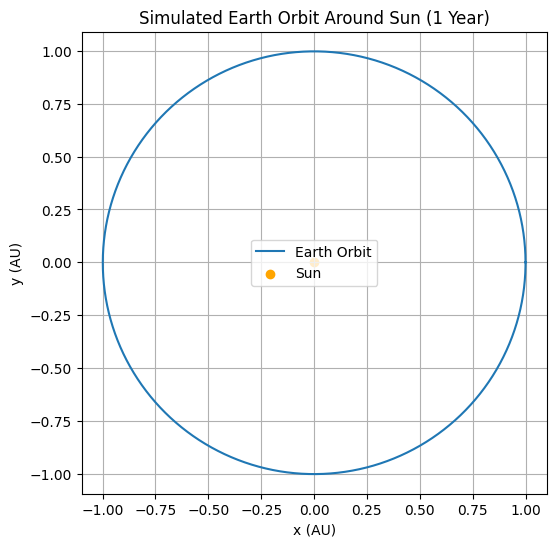

In [ ]:
# Make sure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save dataset to CSV
df = pd.DataFrame({
    'time': t,
    'x': x,
    'y': y,
    'vx': vx,
    'vy': vy
    })
# Save without timestamp
# df.to_csv("data/earth_orbit_simulation.csv", index=False)

# Save with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
df.to_csv(f"data/earth_orbit_simulation_{timestamp}.csv", index=False)

# Plot orbit
plt.figure(figsize=(6, 6))
plt.plot(x / AU, y / AU, label="Earth Orbit")
plt.scatter(0, 0, color='orange', label="Sun")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Simulated Earth Orbit Around Sun (1 Year)")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()